In [1]:
import sys
sys.path.append('../')
sys.path.append('../nemo-eva/src/')

In [2]:
import os
os.getcwd()
sys.path

['/cluster/home/bdayan/girgs/benji_src',
 '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python38.zip',
 '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8',
 '/cluster/apps/nss/gcc-6.3.0/python/3.8.5/x86_64/lib64/python3.8/lib-dynload',
 '',
 '/cluster/home/bdayan/girgs/venv/lib64/python3.8/site-packages',
 '/cluster/home/bdayan/girgs/girg-sampling',
 '../',
 '../nemo-eva/src/']

In [9]:
import numpy as np
import pandas as pd

import networkit as nk
from benji_girgs import fitting, utils, generation, plotting

import seaborn as sns
import powerlaw
import matplotlib.pyplot as plt
import inspect
import powerlaw

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [87]:
import imp
imp.reload(fitting)
imp.reload(plotting)
imp.reload(generation)
from benji_girgs import generation

<module 'benji_girgs.fitting' from '/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py'>

<module 'benji_girgs.plotting' from '/cluster/home/bdayan/girgs/benji_src/benji_girgs/plotting.py'>

<module 'benji_girgs.generation' from '/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py'>

In [46]:
%time
n = 1458
d = 1
tau = 2.9848742153573937
alpha=1.2161985029406228
target_degree = 20.0
const=0.009379502054907412

g, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, const=const)
nk.overview(g)

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs
Network Properties:
nodes, edges			1458, 119
directed?			False
weighted?			False
isolated nodes			1259
self-loops			0
density				0.000112
clustering coefficient		0.005075
min/max/avg degree		0, 6, 0.163237
degree assortativity		0.188199
number of connected components	1342
size of largest component	9 (0.62 %)


In [36]:
nk.overview(g)

Network Properties:
nodes, edges			1458, 149
directed?			False
weighted?			False
isolated nodes			1205
self-loops			0
density				0.000140
clustering coefficient		0.003544
min/max/avg degree		0, 8, 0.204390
degree assortativity		-0.016005
number of connected components	1311
size of largest component	11 (0.75 %)


In [37]:
utils.LCC(g)

0.003543667123914038

In [38]:
nk.globals.clustering(g)

0.16472683053939025

In [40]:
g2 = nk.readGraph('/cluster/scratch/bdayan/GIRG_data/bio-yeast.SpaceOne', nk.Format.EdgeListSpaceOne)
nk.overview(g2)

Network Properties:
nodes, edges			1458, 1948
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.001834
clustering coefficient		0.070830
min/max/avg degree		1, 56, 2.672154
degree assortativity		-0.205456
number of connected components	1
size of largest component	1458 (100.00 %)


In [22]:
dir(nk.centrality.LocalClusteringCoefficient(g))

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'centralization',
 'hasFinished',
 'maximum',
 'ranking',
 'run',
 'score',
 'scores']

In [30]:
def get_largest_component(g):
    """Return the largest connected component of g"""
    components = nk.components.ConnectedComponents(g)
    components.run()
    newGraph = components.extractLargestConnectedComponent(g, True)
    return newGraph

In [31]:
g2 = get_largest_component(g)

In [34]:
nk.overview(g)

Network Properties:
nodes, edges			1458, 145
directed?			False
weighted?			False
isolated nodes			1238
self-loops			0
density				0.000137
clustering coefficient		0.003431
min/max/avg degree		0, 30, 0.198903
degree assortativity		0.032596
number of connected components	1315
size of largest component	55 (3.77 %)


In [32]:
foo = nk.centrality.LocalClusteringCoefficient(g2)
foo.run()
foo.scores()

[0.0,
 0.0022988505747126436,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [11]:
n=5000
%time g, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree)

CPU times: user 4min 2s, sys: 1.61 s, total: 4min 3s
Wall time: 4min 1s


In [10]:
scaled_weights = list(np.array(weights)*const)
%time edges = girgs.generateEdges(scaled_weights, pts, alpha)

CPU times: user 2.69 s, sys: 14.1 ms, total: 2.7 s
Wall time: 2.68 s


In [92]:
degrees = nk.centrality.DegreeCentrality(g).run().scores()
fit = powerlaw.Fit(degrees, fit_method='Likelihood')
print(fit.alpha)
fit = powerlaw.Fit(degrees)
print(fit.alpha)

Calculating best minimal value for power law fit
2.2411792804140456
Calculating best minimal value for power law fit
2.2411792804140456


Values less than or equal to 0 in data. Throwing out 0 or negative values
Values less than or equal to 0 in data. Throwing out 0 or negative values


Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
target_avg_degree: 19.790
target_lcc: 0.626
fit tau: 2.199
const: 0.456
lcc: 0.477 -> lcc2: 0.54; overshoot: False, scale:0.330, alpha: 1.429
const: 0.512
lcc: 0.542 -> lcc2: 0.68; overshoot: True, scale:0.165, alpha: 1.640
const: 0.524
lcc: 0.679 -> lcc2: 0.60; overshoot: True, scale:0.083, alpha: 1.534
Fit! fit_count: -1; post_fit_steps: 2
const: 0.564
lcc: 0.602 -> lcc2: 0.60; overshoot: False, scale:0.091, alpha: 1.582
const: 0.565
lcc: 0.601 -> lcc2: 0.57; overshoot: False, scale:0.100, alpha: 1.640
const: 0.628
lcc: 0.569 -> lcc2: 0.61; overshoot: False, scale:0.110, alpha: 1.711
const: 0.635
lcc: 0.614 -> lcc2: 0.66; overshoot: True, scale:0.055, alpha: 1.799
const: 0.577
lcc: 0.664 -> lcc2: 0.65; overshoot: False, scale:0.060, alpha: 1.755
const: 0.585
lcc: 0.649 -> lcc2: 0.65; overshoot: False, scale:0.066, alpha: 1.710
const: 0.630
lcc: 0.651 -> lcc2: 0.62; overshoot: True, scale:0.033, alpha: 1.662
const: 0.584
lcc: 0.616 -> l

In [18]:
n = 2000
d = 2
tau = 2.1
alpha = 1.8
target_degree = 6.0

In [22]:
def LCC(g):
    lcc = nk.centrality.LocalClusteringCoefficient(g)
    lcc.run()
    return(np.mean(lcc.scores()))

lcc_df = plotting.metric_func_alphas_plot(n, d, tau, target_degree, LCC, 'LCC')
plt.show()

1.02
1.1
1.3
1.6
2.0


ValueError: Could not interpret value `LCC` for parameter `y`

In [ ]:
std_gdist_df = plotting.metric_func_alphas_plot(n, d, tau, target_degree, fitting.regularised_std_graph_distance, 'std_gdist')
plt.show()

In [26]:
import os
os.environ['DATA_PATH'] = '/cluster/home/bdayan/girgs/'
import glob

data_dir = '/cluster/scratch/bdayan/GIRG_data/'

results_csv = '/cluster/home/bdayan/girgs/nemo-eva/data-paper/3-cleaned_features/results.csv'
df = pd.read_csv(results_csv)

graph_name_group_pairs = df.groupby('Graph').Type.unique()
graph_name_group_pairs = graph_name_group_pairs.apply(lambda x: x[0])
graph_name_group_pairs = graph_name_group_pairs.reset_index()

graph_names = sorted(df['Graph'].unique())

graph_dicts = []
for i in range(len(graph_name_group_pairs)):
    stuff = graph_name_group_pairs.iloc[i]
    fn = glob.glob(data_dir + stuff.Graph + '.*')[0]
#     print(fn)
    graph_dict = {"Group": stuff.Type, "FullPath": fn, "Name": stuff.Graph}
    graph_dicts.append(graph_dict)

In [27]:
graph_dicts[:7]

[{'Group': 'bio',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bio-celegans.SpaceOne',
  'Name': 'bio-celegans'},
 {'Group': 'bio',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bio-celegans-dir.SpaceOne',
  'Name': 'bio-celegans-dir'},
 {'Group': 'bio',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bio-diseasome.SpaceOne',
  'Name': 'bio-diseasome'},
 {'Group': 'bio',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bio-dmela.SpaceOne',
  'Name': 'bio-dmela'},
 {'Group': 'bio',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bio-yeast.SpaceOne',
  'Name': 'bio-yeast'},
 {'Group': 'bio',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bio-yeast-protein-inter.SpaceOne',
  'Name': 'bio-yeast-protein-inter'},
 {'Group': 'bn',
  'FullPath': '/cluster/scratch/bdayan/GIRG_data/bn-fly-drosophila_medulla_1.SpaceOne',
  'Name': 'bn-fly-drosophila_medulla_1'}]

Index(['Graph', 'Centrality.Betweenness.Dispersion.Coefficient Of Variation',
       'Centrality.Betweenness.Dispersion.Standard Deviation',
       'Centrality.Betweenness.Dispersion.Standard Deviation (Rank)',
       'Centrality.Betweenness.Dispersion.Uncorrected Coefficient Of Variation',
       'Centrality.Betweenness.Dispersion.Uncorrected Standard Deviation',
       'Centrality.Betweenness.Dispersion.Uncorrected Standard Deviation (Rank)',
       'Centrality.Betweenness.Dispersion.Uncorrected Variance',
       'Centrality.Betweenness.Dispersion.Uncorrected Variance (Rank)',
       'Centrality.Betweenness.Dispersion.Variance',
       ...
       'Partition.CoreDecomposition.Location.Cubic Mean',
       'Partition.CoreDecomposition.Location.Harmonic Mean',
       'Partition.CoreDecomposition.Location.Interquartile Mean',
       'Partition.CoreDecomposition.Location.Max',
       'Partition.CoreDecomposition.Location.Median',
       'Partition.CoreDecomposition.Location.Mid-Range',
   

In [39]:
df.loc[df.Graph.isin([x['Name'] for x in graph_dicts[:7]]), ['Graph', 'Nodes']]

,Graph,Nodes
48,bio-yeast-protein-inter,1458
49,bio-yeast-protein-inter,1458
50,bio-yeast-protein-inter,1328
51,bio-yeast-protein-inter,1106
52,bio-yeast-protein-inter,1108
53,bio-yeast-protein-inter,1458
168,bio-diseasome,516
169,bio-diseasome,516
170,bio-diseasome,512
171,bio-diseasome,459


In [80]:
in_path = '/cluster/scratch/bdayan/GIRG_data/bio-diseasome.SpaceOne'
g = nk.readGraph(in_path, nk.Format.EdgeListSpaceOne)

In [81]:
from feature_extractor import FeatureExtractor
fe = FeatureExtractor([])

In [88]:
d = 2
n = g.numberOfNodes()
alpha, const, tau, hist, fit = fitting.fit_cgirg(g, d, verbose=True)

Calculating best minimal value for power law fit
target_avg_degree: 4.605
target_lcc: 0.636
fit tau: 3.400
const: 0.226
lcc: 0.224 -> lcc2: 0.27; overshoot: False, scale:0.330, alpha: 1.429
const: 0.270
lcc: 0.265 -> lcc2: 0.34; overshoot: False, scale:0.363, alpha: 1.640
const: 0.352
lcc: 0.341 -> lcc2: 0.41; overshoot: False, scale:0.399, alpha: 2.004
const: 0.399
lcc: 0.414 -> lcc2: 0.49; overshoot: False, scale:0.439, alpha: 2.672
const: 0.513
lcc: 0.494 -> lcc2: 0.50; overshoot: False, scale:0.483, alpha: 3.981
const: 0.536
lcc: 0.497 -> lcc2: 0.54; overshoot: False, scale:0.531, alpha: 6.768
const: 0.667
lcc: 0.535 -> lcc2: 0.58; overshoot: False, scale:0.585, alpha: 13.310
const: 0.679
lcc: 0.581 -> lcc2: 0.53; overshoot: False, scale:0.643, alpha: 30.636
const: 0.689
lcc: 0.526 -> lcc2: 0.57; overshoot: False, scale:0.707, alpha: 84.031
const: 0.715
lcc: 0.574 -> lcc2: 0.56; overshoot: False, scale:0.778, alpha: 284.754
const: 0.660
lcc: 0.561 -> lcc2: 0.55; overshoot: False, s

In [83]:
nk.overview(g)

Network Properties:
nodes, edges			516, 1188
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.008941
clustering coefficient		0.635830
min/max/avg degree		1, 50, 4.604651
degree assortativity		0.087761
number of connected components	1
size of largest component	516 (100.00 %)


In [55]:
d = 1
n = g.numberOfNodes()

dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
fit = powerlaw.Fit(dd, discrete=True)
tau = fit.power_law.alpha


target_avg_degree = utils.avg_degree(g)

target_lcc = utils.LCC(g)

def girg_and_const_gen_func(alpha):
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_avg_degree, weights=None)
    return g, c

caf = fitting.CGirgAlphaFitter(target_lcc, target_avg_degree, girg_and_const_gen_func)
caf.verbose=True

Calculating best minimal value for power law fit


In [53]:
target_lcc, target_avg_degree

(0.011850175241937459, 6.917083727850669)

In [56]:
caf.step()

const: 0.527
lcc: 0.204 -> lcc2: 0.15; overshoot: False, scale:0.330, alpha: 1.210


In [57]:
caf.step()

const: 0.435
lcc: 0.154 -> lcc2: 0.12; overshoot: False, scale:0.363, alpha: 1.141


In [58]:
caf.step_n(10)

const: 0.366
lcc: 0.120 -> lcc2: 0.10; overshoot: False, scale:0.399, alpha: 1.090
const: 0.322
lcc: 0.096 -> lcc2: 0.08; overshoot: False, scale:0.439, alpha: 1.054
const: 0.292
lcc: 0.078 -> lcc2: 0.07; overshoot: False, scale:0.483, alpha: 1.030
const: 0.273
lcc: 0.070 -> lcc2: 0.06; overshoot: False, scale:0.531, alpha: 1.016
const: 0.264
lcc: 0.063 -> lcc2: 0.06; overshoot: False, scale:0.585, alpha: 1.007
const: 0.259
lcc: 0.058 -> lcc2: 0.06; overshoot: False, scale:0.643, alpha: 1.003
const: 0.256
lcc: 0.060 -> lcc2: 0.06; overshoot: False, scale:0.707, alpha: 1.001
const: 0.254
lcc: 0.058 -> lcc2: 0.06; overshoot: False, scale:0.778, alpha: 1.000
const: 0.256
lcc: 0.057 -> lcc2: 0.06; overshoot: False, scale:0.856, alpha: 1.000
const: 0.256
lcc: 0.060 -> lcc2: 0.06; overshoot: False, scale:0.900, alpha: 1.000


In [70]:
caf.step()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/cluster/home/bdayan/girgs/venv/lib64/python3.8/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/scratch/tmp.14570310.bdayan/ipykernel_78067/2063847991.py", line 1, in <module>
    caf.step()
  File "/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py", line 208, in step
  File "/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py", line 385, in girg_gen_func
    def girg_gen_func(self, alpha):
  File "/scratch/tmp.14570310.bdayan/ipykernel_78067/1602537128.py", line 14, in girg_and_const_gen_func
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_avg_degree, weights=None)
  File "/cluster/home/bdayan/girgs/benji_src/benji_girgs/generation.py", line 254, in cgirg_gen
    const = girgs.scaleWeights(weights, desiredAvgDegree, d, alpha)
  File "/cluster/home/bdayan/girgs/girg-sampling/girg_sampli

In [77]:
ggirg = caf.girg_gen_func(caf.param)

RuntimeError: Caught an unknown exception!

In [75]:
caf.param == 1.0

True

In [62]:
def mean_gdist(g, degree_percentile=0.9, n_samples=1000):
    dd = nk.centrality.DegreeCentrality(g).run().scores()
    dd = np.array(dd)
    bot_percentile_degree_indices = np.argsort(dd)[:int(degree_percentile*len(dd))]
    g_sub = utils.quick_subgraph(g, bot_percentile_degree_indices)
    cc = nk.components.ConnectedComponents(g_sub)
    # cc.run()
    g_sub = cc.extractLargestConnectedComponent(g_sub, True)
    if g_sub.numberOfNodes() < degree_percentile*0.15*len(dd):
        raise ValueError('Too many nodes removed')
    distances, std_distances, unique_dists, dist_counts = fitting.graph_distances(g_sub, n_samples)
    return np.mean(distances)
    
mean_gdist_df = plotting.metric_func_alphas_plot(n, d, tau, 20.0, mean_gdist, 'mean_gdist')
plt.show()

1.02


KeyboardInterrupt: 

4.538

In [8]:
std_gdist_df = plotting.metric_func_alphas_plot(n, d, tau, 20.0, fitting.regularised_std_graph_distance, 'std_gdist')
plt.show()

In [14]:
len(lcc.scores())

2000

In [103]:
n = 2000
d = 2
tau = 2.1
alpha = 1.08
target_degree = 20.0

alpha, const, hist, fit = fitting.fit_cgirg(g, d, verbose=True)

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
target_avg_degree: 20.021
target_std_gdist: 1.251
fit tau: 2.247
const: 0.309
std_gdist: 1.395 -> std_gdist2: 1.18; overshoot: True, scale:0.150, alpha: 1.210
const: 0.331
std_gdist: 1.182 -> std_gdist2: 1.20; overshoot: False, scale:0.165, alpha: 1.247
const: 0.379
std_gdist: 1.200 -> std_gdist2: 1.25; overshoot: True, scale:0.083, alpha: 1.296
Fit! fit_count: -1; post_fit_steps: 2
const: 0.330
std_gdist: 1.253 -> std_gdist2: 1.28; overshoot: False, scale:0.091, alpha: 1.271
const: 0.328
std_gdist: 1.279 -> std_gdist2: 1.34; overshoot: False, scale:0.100, alpha: 1.247
const: 0.317
std_gdist: 1.340 -> std_gdist2: 1.10; overshoot: True, scale:0.050, alpha: 1.222
const: 0.316
std_gdist: 1.100 -> std_gdist2: 1.25; overshoot: False, scale:0.055, alpha: 1.234
Fit! fit_count: 2; post_fit_steps: 2
const: 0.336
std_gdist: 1.250 -> std_gdist2: 1.29; overshoot: True, scale:0.027, alpha: 1.247
Fit! fit_count: 2; post_fit_steps: 2


In [106]:
str(hist)

'[(1.3, 1.3947584020180699), (1.21, 1.1818963575542485), (1.2470588235294118, 1.1995961820546113), (1.295878830574146, 1.253248179731373), (1.2714688270517789, 1.2792185114357906), (1.24683303099683, 1.3398567087565745), (1.2221929236775715, 1.1002381560371375), (1.233865747815408, 1.2499903999631357), (1.2474517783933732, 1.2904413973520843)]'

In [83]:
n = 2000
d = 2
tau = 2.1
alpha = 1.08
target_degree = 20.0

g, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree)
print(f'const: {const:.3f}')
verbose=True

target_avg_degree = utils.avg_degree(g)
target_std_gdist = fitting.regularised_std_graph_distance(g)
if verbose:
    print(f'target_avg_degree: {target_avg_degree:.3f}')
    print(f'target_std_gdist: {target_std_gdist:.3f}')

dd = sorted(nk.centrality.DegreeCentrality(g).run().scores(), reverse=True)
fit = powerlaw.Fit(dd, discrete=True)
tau2 = fit.power_law.alpha
print(f'tau2: {tau2}')

n = g.numberOfNodes()


def girg_and_const_gen_func(alpha):
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau2, alpha, desiredAvgDegree=target_avg_degree, weights=None)
    return g, c

caf = fitting.CGirgAlphaFitter(target_std_gdist, target_avg_degree, girg_and_const_gen_func)
# Try to be quite lenient in allowing fitting to occur :)
caf.fit_percent=0.04
caf.max_fit_steps = 50
caf.post_fit_steps = 2
caf.verbose = verbose

caf.fit()

const: 0.237
target_avg_degree: 20.010
target_std_gdist: 0.982
Calculating best minimal value for power law fit
tau2: 2.3474322977206734


Values less than or equal to 0 in data. Throwing out 0 or negative values


Fit! fit_count: -1; post_fit_steps: 2
const: 0.559
std_gdist: 0.961 -> std_gdist2: 1.20; overshoot: True, scale:0.150, alpha: 1.429
const: 0.520
std_gdist: 1.196 -> std_gdist2: 1.09; overshoot: False, scale:0.165, alpha: 1.364
const: 0.470
std_gdist: 1.091 -> std_gdist2: 1.02; overshoot: False, scale:0.182, alpha: 1.304
const: 0.458
std_gdist: 1.021 -> std_gdist2: 1.04; overshoot: False, scale:0.200, alpha: 1.249
const: 0.378
std_gdist: 1.036 -> std_gdist2: 0.97; overshoot: True, scale:0.100, alpha: 1.199
const: 0.416
std_gdist: 0.969 -> std_gdist2: 0.90; overshoot: False, scale:0.110, alpha: 1.221
const: 0.391
std_gdist: 0.904 -> std_gdist2: 1.05; overshoot: True, scale:0.055, alpha: 1.249
const: 0.438
std_gdist: 1.055 -> std_gdist2: 0.91; overshoot: True, scale:0.027, alpha: 1.235
const: 0.419
std_gdist: 0.905 -> std_gdist2: 0.99; overshoot: True, scale:0.014, alpha: 1.242
const: 0.442
std_gdist: 0.994 -> std_gdist2: 0.95; overshoot: True, scale:0.007, alpha: 1.238
Fit! fit_count: 2;

1.02
1.08
1.3
1.6
2.0


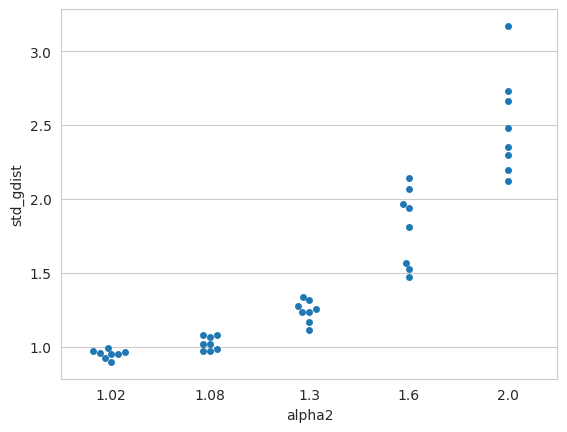

In [84]:
df = fitting.reg_std_gdist_alphas_plot(n, d, tau)
plt.show()

1.02
1.08
1.3
1.6
2.0


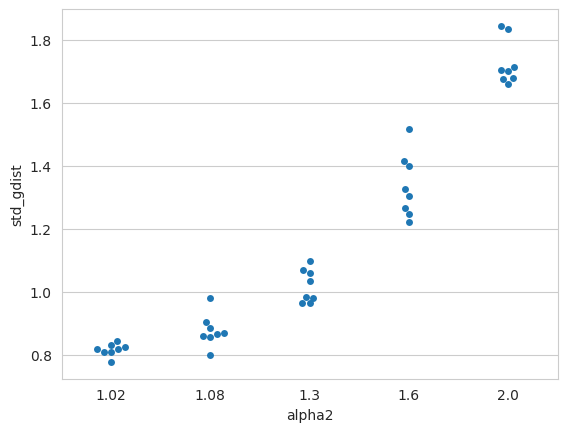

In [89]:
df = fitting.reg_std_gdist_alphas_plot(n, d, tau2)
plt.show()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
powerlaw alpha: 2.347


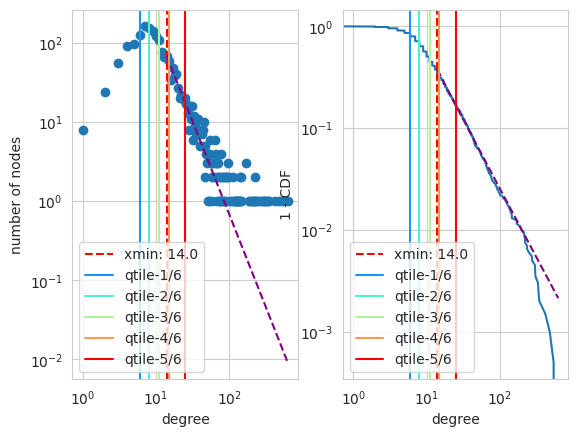

In [92]:
plotting.plot_degree_dist(g, pl_fit=True, vlines=6)

In [ ]:
n = 10000
d = 2
tau = 2.1
alpha = 1.08
target_degree = 20.0

g, edges, weights, pts, const, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree)

In [ ]:
g.isWeighted()

Values less than or equal to 0 in data. Throwing out 0 or negative values


Calculating best minimal value for power law fit
powerlaw alpha: 2.247


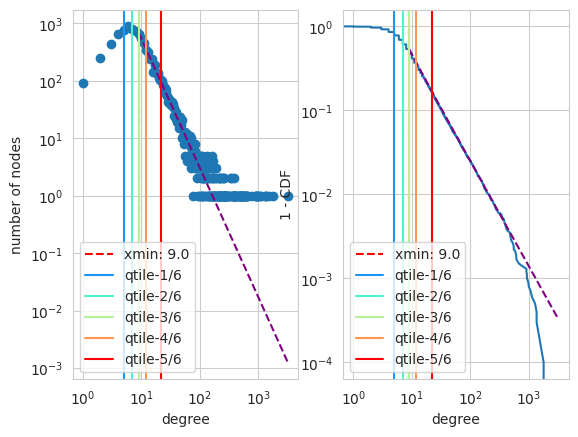

In [100]:
plotting.plot_degree_dist(g, pl_fit=True, vlines=6)

In [88]:
caf.param
caf.tau

1.2399770696227301

AttributeError: 'CGirgAlphaFitter' object has no attribute 'tau'

In [78]:
fitting.regularised_std_graph_distance(g, n_samples=5000)

1.1884753089568163

In [79]:
print(n, d, tau, alpha,target_degree)

2000 2 2.32063440309481 1.08 20.0


In [80]:
tau

2.32063440309481

In [30]:
df = pd.DataFrame(data={'x': [1,2], 'y': [3,4]})
sns.swarmplot(data=df, x='x', y='y')

<Axes: xlabel='x', ylabel='y'>

In [14]:
print(inspect.getsource(fitting.reg_std_gdist_alphas_plot))

def reg_std_gdist_alphas_plot(n, d, tau, alphas=[1.02, 1.08, 1.3, 1.6, 2.0], target_degree=20.0):
    """
    Plot the regularised standard graph distance as a function of alpha
    """
    df = pd.DataFrame(columns=['alpha', 'std_gdist'])
    i=0
    for alpha in alphas:
        print(alpha)
        for _ in range(8):
            g, edges, weights, pts, c, id2gnk = cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=None)
            try:
                std_gdist = regularised_std_graph_distance(g)
                df.loc[i] = [alpha, std_gdist]
            except ValueError:
                pass
            i += 1
        
        
    # df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
    # df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))

    df['alpha2'] = df.alpha.apply(lambda x: str(x))

    sns.swarmplot(data=df, x='alpha2', y='std_gdist')



1.02
1.08
1.3
1.6
2.0


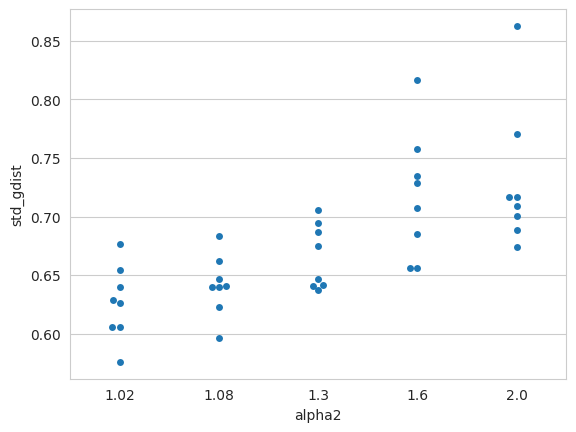

In [37]:
def reg_std_gdist_alphas_plot(n, d, tau, alphas=[1.02, 1.08, 1.3, 1.6, 2.0], target_degree=20.0):
    """
    Plot the regularised standard graph distance as a function of alpha
    """
    df = pd.DataFrame(columns=['alpha', 'std_gdist'])
    i=0
    for alpha in alphas:
        print(alpha)
        for _ in range(8):
            g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=None)
            try:
                std_gdist = fitting.regularised_std_graph_distance(g)
                df.loc[i] = [alpha, std_gdist]
            except ValueError:
                pass
            i += 1
        
        
    # df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
    # df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))

    df['alpha2'] = df.alpha.apply(lambda x: str(x))

    sns.swarmplot(data=df, x='alpha2', y='std_gdist')
    
reg_std_gdist_alphas_plot(100, 2, 2.1)
plt.show()

1.02
1.08
1.3
1.6
2.0


<Axes: xlabel='x', ylabel='y'>

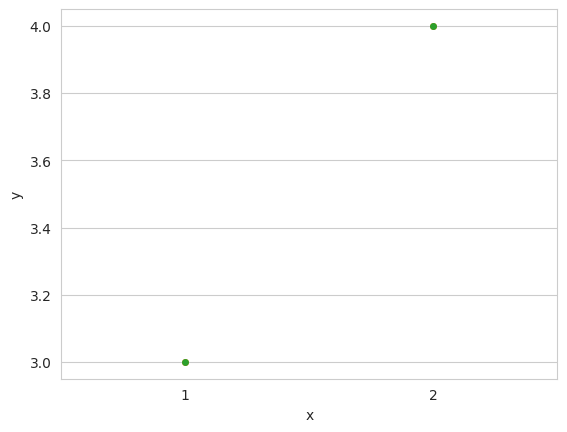

/cluster/home/bdayan/girgs/venv/lib64/python3.8/site-packages/seaborn/categorical.py:3544: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


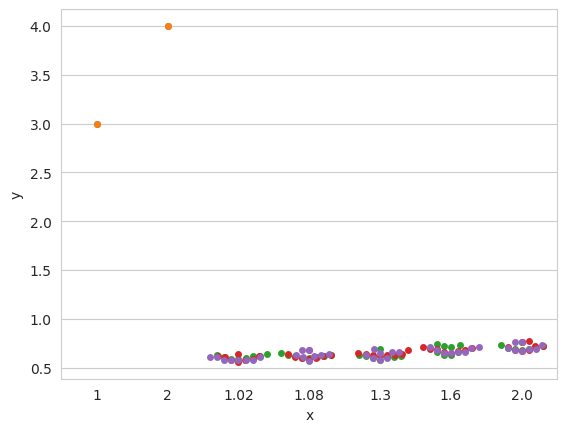

In [34]:
df = pd.DataFrame(columns=['alpha', 'std_gdist'])
i=0
alphas = [1.02, 1.08, 1.3, 1.6, 2.0]
for alpha in alphas:
    print(alpha)
    for _ in range(8):
        g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(100, d, tau, alpha, desiredAvgDegree=target_degree, weights=None)
        try:
            std_gdist = fitting.regularised_std_graph_distance(g, 0.9, n_samples=1000)
            df.loc[i] = [alpha, std_gdist]
        except ValueError:
            pass
        i += 1


# df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
# df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))

df['alpha2'] = df.alpha.apply(lambda x: str(x))

sns.swarmplot(data=df, x='alpha2', y='std_gdist')
plt.show()

In [7]:
ggirg = caf.girg_gen_func(caf.param)
# nk.overview(ggirg)
fitting.regularised_std_graph_distance(ggirg, degree_percentile=0.9)
caf.metric_func(ggirg)

const: 0.454


1.1766864493143447

1.2484854824946905

In [6]:
fitting.regularised_std_graph_distance(g, degree_percentile=0.9)

1.7304785465298322

In [7]:
alpha

2.0

In [44]:
import inspect
print(inspect.getsource(caf.metric_func))

    def fit(self):
        """Steps until the average degree is within 3% of the target average degree
        Some extra steps are taken once the fit is acheived to confirm that the fit is stable.
        These extra steps may be repeated if the fit is not stable."""
        num_steps = 0
        while True:
            if self.fit_count == -1:
                while not self.check_fit():
                    self.step()
                self.fit_count = 0
            if self.fit_count == self.post_fit_steps:
                if self.check_fit():
                    break
                else:
                    self.fit_count = 0
            self.step()
            self.fit_count += 1

        while True:
            self.step()
            num_steps +=1 
            if num_steps > self.max_fit_steps:
                raise NotImplementedError('Max fit steps exceeded')
            now_fit = self.check_fit()
            if self.fit_count == -1:
                if now_fit:
                

In [4]:
n = 1000
d = 3
tau = 2.1
alpha = 1.9
const = 0.2
weights=None
std_gdists = []
avg_degs = []
for _ in range(5):
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, const=const, weights=weights)
    std_gdists.append(fitting.regularised_std_graph_distance(g))
    avg_degs.append(utils.avg_degree(g))


In [20]:
target_avg_degree=14.73
target_std_gdist = 2.05

weights=None
# weights = list(degrees))
def girg_and_const_gen_func(alpha):
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_avg_degree, weights=None)
    return g, c

caf = fitting.CGirgAlphaFitter(target_std_gdist, target_avg_degree, girg_and_const_gen_func)
caf.verbose=True
caf.post_fit_steps=2
# caf.fit_percent=fitting.get_fit_percent(target_std_gdist)
caf.fit_percent = 0.03
caf.fit()
# for _ in range(15):
#     caf.step()
#     girg = caf.girg_gen_func(caf.param)
#     print(f'avg degree: {utils.avg_degree(girg):.3f}')

const: 0.144
std_gdist: 1.257 -> std_gdist2: 1.72; overshoot: False, scale:0.330, alpha: 1.429
const: 0.175
std_gdist: 1.721 -> std_gdist2: 1.83; overshoot: False, scale:0.363, alpha: 1.640
const: 0.227
std_gdist: 1.835 -> std_gdist2: 1.73; overshoot: False, scale:0.399, alpha: 2.004
const: 0.301
std_gdist: 1.730 -> std_gdist2: 2.17; overshoot: True, scale:0.200, alpha: 2.672
const: 0.271
std_gdist: 2.170 -> std_gdist2: 2.69; overshoot: False, scale:0.220, alpha: 2.338
const: 0.233
std_gdist: 2.693 -> std_gdist2: 1.91; overshoot: True, scale:0.110, alpha: 2.044
const: 0.274
std_gdist: 1.905 -> std_gdist2: 2.00; overshoot: False, scale:0.121, alpha: 2.173
Fit! fit_count: -1; post_fit_steps: 2
const: 0.247
std_gdist: 2.003 -> std_gdist2: 2.24; overshoot: True, scale:0.060, alpha: 2.334
const: 0.265
std_gdist: 2.238 -> std_gdist2: 2.04; overshoot: True, scale:0.030, alpha: 2.253
Fit! fit_count: 2; post_fit_steps: 2


In [18]:
caf.verbose=True
for _ in range(10):
    girg = caf.girg_gen_func(caf.param)
#     print(caf.metric_func(girg))
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, caf.param, const=caf.const, weights=None)
    print(f'caf girg: {fitting.regularised_std_graph_distance(girg):.3f} rep girg: {fitting.regularised_std_graph_distance(g):.3f}')

const: 0.252
caf girg: 2.221 rep girg: 2.846
const: 0.252
caf girg: 2.504 rep girg: 4.230
const: 0.243
caf girg: 3.149 rep girg: 2.463
const: 0.246
caf girg: 2.160 rep girg: 2.310
const: 0.233
caf girg: 2.480 rep girg: 2.124
const: 0.243
caf girg: 2.475 rep girg: 2.127
const: 0.266
caf girg: 1.967 rep girg: 1.700
const: 0.256
caf girg: 2.007 rep girg: 2.234
const: 0.218
caf girg: 2.797 rep girg: 3.505
const: 0.223
caf girg: 1.829 rep girg: 2.206


In [15]:
alpha, caf.param

(1.9, 2.1542134724545616)

In [10]:
for _ in range(5):
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, const=const, weights=weights)
    print(fitting.regularised_std_graph_distance(g))

2.42794542772279
2.432920878286016
2.2723993927124693
2.3330460775561206
2.3962938050247513


In [7]:
target_avg_degree=14.73
target_std_gdist = 2.05

weights=None
# weights = list(degrees))
def girg_and_const_gen_func(alpha):
    g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_avg_degree, weights=None)
    return g, c

g, c = girg_and_const_gen_func(1.5)

In [16]:
caf = fitting.CGirgAlphaFitter(target_std_gdist, target_avg_degree, girg_and_const_gen_func)
caf.verbose=True
caf.post_fit_steps=2
# caf.fit_percent=fitting.get_fit_percent(target_std_gdist)
caf.fit_percent = 0.03

self = caf

In [11]:
utils.avg_degree(caf.girg_gen_func(1.5))

const: 0.177


15.096

In [17]:
fitting.scale_param(self.param, self.scale, self.param_base, self.larger)


1.4285714285714286

In [18]:
girg = self.girg_gen_func(self.param)

const: 0.137


In [21]:
metric = self.metric_func(girg)

In [22]:
larger = metric < self.target_metric

self.overshoot = (larger != self.larger)
self.scale *= (self.scale_down if self.overshoot else self.scale_up)
self.scale = min(self.scale, 0.9)

In [23]:
caf.step()

const: 0.161
std_gdist: 1.564 -> std_gdist2: 1.56; overshoot: False, scale:0.363, alpha: 1.448


In [ ]:
girg = caf.girg_gen_func(caf.alpha)

In [43]:
alphas = 1.1, 1.3, 2.0
consts = 0.1, 1.0, 5.0

[(alpha, const) for alpha in alphas for const in consts]

[(1.1, 0.1),
 (1.1, 1.0),
 (1.1, 5.0),
 (1.3, 0.1),
 (1.3, 1.0),
 (1.3, 5.0),
 (2.0, 0.1),
 (2.0, 1.0),
 (2.0, 5.0)]

In [ ]:
n = 500
d = 2
tau = 2.1
alpha = 1.1
target_degree = 10.0
weights=None

df = pd.DataFrame(columns=['alpha', 'std_gdist', 'mean_gedist'])
i=0
for alpha in alphas:
    print(alpha)
    for _ in range(8):
        g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
        try:
            std_gdist = fitting.regularised_std_graph_distance(g, 1.0, n_samples=1000)
            df.loc[2*i] = [alpha, std_gdist, False]
        except ValueError:
            pass
        try:
            std_gdist2 = fitting.regularised_std_graph_distance(g, 1.0, n_samples=4000)
            df.loc[2*i + 1] = [alpha, std_gdist, True]
        except ValueError:
            continue
        i += 1
    
    
# df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
# df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['alpha2'] = df.alpha.apply(lambda x: str(x))

sns.swarmplot(data=df, x='alpha2', y='std_gdist', hue='all')



<Axes: xlabel='mean_dist', ylabel='std_gdist'>

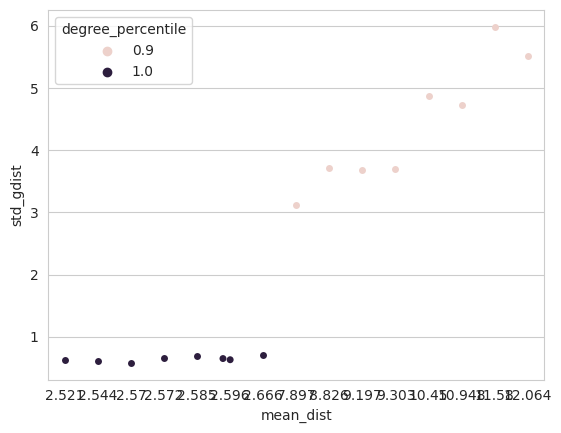

In [47]:
n = 500
d = 2
tau = 2.1
alphas = 1.02, 1.1, 1.3, 1.6, 2.0
target_degree = 10.0
weights=None

df = pd.DataFrame(columns=['alpha', 'std_gdist', 'mean_dist', 'degree_percentile'])
i=0
# for alpha in alphas:
#     print(alpha)
for degree_percentile in 0.8, 0.9, 1.0:
    for _ in range(8):
        g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
        try:
#             degree_percentile=1.0
            n_samples=1000
            dd = nk.centrality.DegreeCentrality(g).run().scores()
            dd = np.array(dd)
            bot_percentile_degree_indices = np.argsort(dd)[:int(degree_percentile*len(dd))]
            g_sub = utils.quick_subgraph(g, bot_percentile_degree_indices)
            cc = nk.components.ConnectedComponents(g_sub)
            # cc.run()
            g_sub = cc.extractLargestConnectedComponent(g_sub, True)
            if g_sub.numberOfNodes() < degree_percentile*0.15*len(dd):
                raise ValueError('Too many nodes removed')
            distances, std_distances, unique_dists, dist_counts = fitting.graph_distances(g_sub, n_samples)
            mean_dist = np.mean(distances)
            df.loc[i] = [alpha, std_distances, mean_dist, degree_percentile]
        except ValueError:
            continue
        i += 1
    
    
# df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
# df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['alpha2'] = df.alpha.apply(lambda x: str(x))

sns.swarmplot(data=df, x='mean_dist', y='std_gdist', hue='degree_percentile')



1.02
1.08
1.3
1.6
2.0


<Axes: xlabel='alpha2', ylabel='std_gdist'>

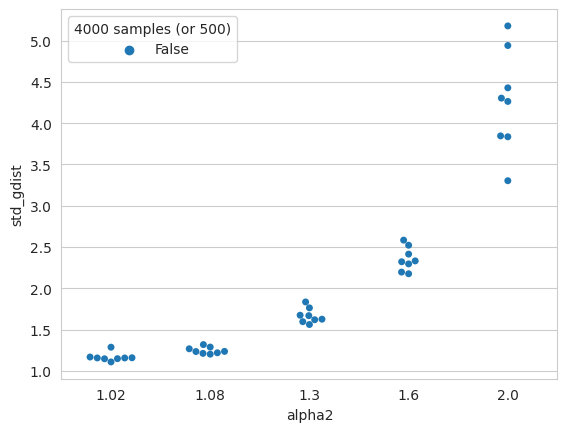

In [17]:
n = 2000
d = 2
tau = 2.1
alpha = 1.08
alphas = 1.02, 1.08, 1.3, 1.6, 2.0
target_degree = 17.1
weights=None

df = pd.DataFrame(columns=['alpha', 'std_gdist', '4000 samples (or 500)'])
i=0
for alpha in alphas:
    print(alpha)
    for _ in range(8):
        g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
        try:
            std_gdist = fitting.regularised_std_graph_distance(g, 0.9, n_samples=1000)
            df.loc[2*i] = [alpha, std_gdist, False]
        except ValueError:
            pass
        
#         try:
#             std_gdist = fitting.regularised_std_graph_distance(g, 0.85, n_samples=4000)
#             df.loc[2*i+1] = [alpha, std_gdist, True]
#         except ValueError:
#             pass
        i += 1
    
    
# df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
# df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['alpha2'] = df.alpha.apply(lambda x: str(x))

sns.swarmplot(data=df, x='alpha2', y='std_gdist', hue='4000 samples (or 500)')



1.02
1.1


/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False


1.3


/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False


1.6


/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False


2.0


/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False
/cluster/home/bdayan/girgs/benji_src/benji_girgs/fitting.py:91: RuntimeWarning: invalid value encountered in cast
  fixed_infinite_dist = False


<Axes: xlabel='alpha2', ylabel='std_gdist'>

<Axes: xlabel='alpha2', ylabel='std_gdist'>

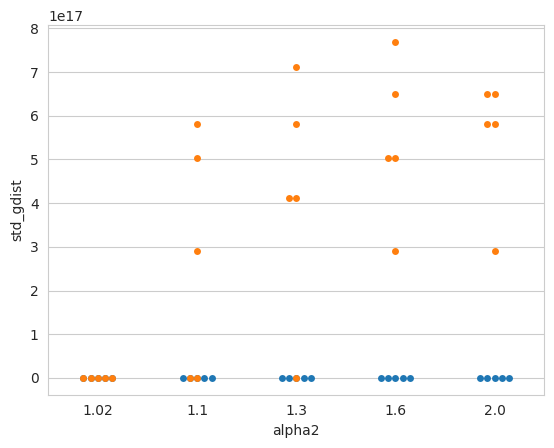

In [26]:
n =4000
d = 2
tau = 2.1
alphas = 1.02, 1.1, 1.3, 1.6, 2.0
target_degree = 20.0
weights=None

df = pd.DataFrame(columns=['alpha', 'std_gdist', 'non_reg_std_gdist'])
i=0
for alpha in alphas:
    print(alpha)
    try:
        for _ in range(5):
            g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
            std_gdist = fitting.regularised_std_graph_distance(g)
            _, non_reg_std_gdist, _, _ = fitting.graph_distances(g)
            df.loc[i] = [alpha, std_gdist, non_reg_std_gdist]
            i += 1
    except ValueError:
        continue
    
    
# df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
# df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['alpha2'] = df.alpha.apply(lambda x: str(x))

sns.swarmplot(data=df, x='alpha2', y='std_gdist') # , hue_order=_genders, aspect=1.61)
sns.swarmplot(data=df, x='alpha2', y='non_reg_std_gdist') # , hue_order=_genders, aspect=1.61)



1.02
1.1
1.3
1.6
2.0


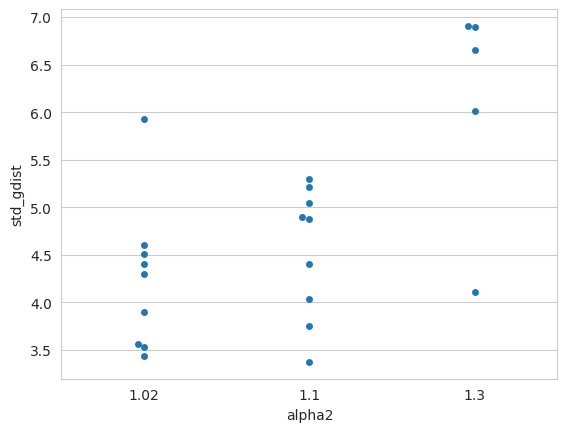

In [25]:
n =1000
d = 2
tau = 2.1
alphas = 1.02, 1.1, 1.3, 1.6, 2.0
target_degree = 5.0
weights=None

df = pd.DataFrame(columns=['alpha', 'std_gdist'])
i=0
for alpha in alphas:
    print(alpha)
    try:
        for _ in range(9):
            g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
            std_gdist = fitting.regularised_std_graph_distance(g)
            df.loc[i] = [alpha, std_gdist]
            i += 1
    except ValueError:
        continue
    
    
# df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
# df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['alpha2'] = df.alpha.apply(lambda x: str(x))

g = sns.swarmplot(data=df, x='alpha2', y='std_gdist') # , hue_order=_genders, aspect=1.61)



In [55]:
n =1000
d = 2
tau = 2.1
alphas = 1.02, 1.1, 1.3, 2.0
target_degrees = 5.0, 10.0, 20.0, 40.0, 80.0
weights=None

df = pd.DataFrame(columns=['alpha', 'target_degree', 'std_gdists', 'avg_degs'])

for i, (alpha, target_degree) in enumerate([(alpha, target_degree) for alpha in alphas for target_degree in target_degrees]):
    print(alpha, target_degree)
    std_gdists = []
    avg_degs = []
    try:
        for _ in range(8):
            g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
            std_gdists.append(fitting.regularised_std_graph_distance(g))
            avg_degs.append(utils.avg_degree(g))
    except ValueError:
        continue
        
    df.loc[i] = [alpha, target_degree, std_gdists, avg_degs]
    
    
df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['avg_degree'] = df.avg_degs.apply(lambda x: np.mean(x))
df['target_degree2'] = df.target_degree.apply(lambda x: str(x))


1.02 5.0
1.02 10.0
1.02 20.0
1.02 40.0
1.02 80.0
1.1 5.0
1.1 10.0
1.1 20.0
1.1 40.0
1.1 80.0
1.3 5.0
1.3 10.0
1.3 20.0
1.3 40.0
1.3 80.0
2.0 5.0
2.0 10.0
2.0 20.0
2.0 40.0
2.0 80.0


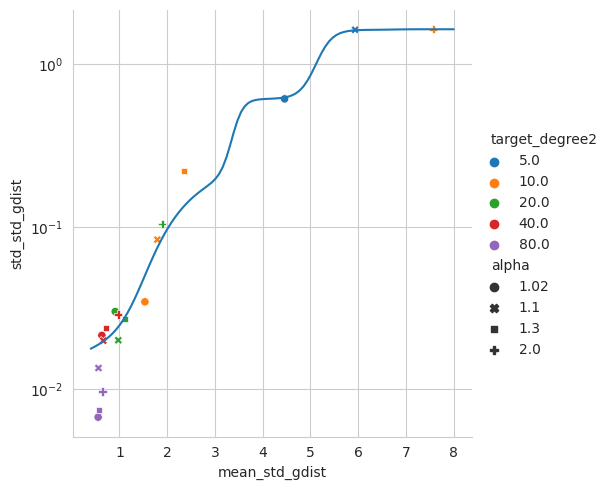

In [64]:
import seaborn as sns


g = sns.relplot(data=df, x='mean_std_gdist', y='std_std_gdist', hue='target_degree2', style='alpha')# , hue_order=_genders, aspect=1.61)

# g = sns.relplot(...)
# g.set(xscale="log")
g.set(yscale="log")

means = np.linspace(0.5, 6, 10)
ys = np.exp(means * 0.85)/100
def get_std_std_gdist(std_gdist):
    return np.exp(std_gdist * 0.85) / 100

def gaussian_kernel(x, x_i, bandwidth):
    return np.exp(-0.5 * ((x - x_i) / bandwidth) ** 2) / (bandwidth * np.sqrt(2 * np.pi))

def kernel_regression(X, y, x, bandwidth):
    weights = gaussian_kernel(x, X, bandwidth)
    return np.dot(weights, y) / np.sum(weights)

x_plot = np.linspace(0.4, 8, num=100)
y_plot = [kernel_regression(df.mean_std_gdist, df.std_std_gdist, x, 0.5) for x in x_plot]
plt.plot(x_plot, y_plot)


# plt.plot(means, ys)

In [65]:
n =200
d = 2
tau = 2.1
alphas = 1.02, 1.1, 1.3, 2.0
target_degrees = 5.0, 10.0, 20.0, 40.0, 80.0
weights=None

df = pd.DataFrame(columns=['alpha', 'target_degree', 'std_gdists', 'avg_degs'])

for i, (alpha, target_degree) in enumerate([(alpha, target_degree) for alpha in alphas for target_degree in target_degrees]):
    print(alpha, target_degree)
    std_gdists = []
    avg_degs = []
    try:
        for _ in range(8):
            g, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_degree, weights=weights)
            std_gdists.append(fitting.regularised_std_graph_distance(g))
            avg_degs.append(utils.avg_degree(g))
    except ValueError:
        continue
        
    df.loc[i] = [alpha, target_degree, std_gdists, avg_degs]
    
    
df['mean_std_gdist'] = df.std_gdists.apply(lambda x: np.mean(x))
df['std_std_gdist'] = df.std_gdists.apply(lambda x: np.std(x))
df['avg_degree'] = df.avg_degs.apply(lambda x: np.mean(x))
df['target_degree2'] = df.target_degree.apply(lambda x: str(x))


1.02 5.0
1.02 10.0
1.02 20.0
1.02 40.0
1.02 80.0
1.1 5.0
1.1 10.0
1.1 20.0
1.1 40.0
1.1 80.0
1.3 5.0
1.3 10.0
1.3 20.0
1.3 40.0
1.3 80.0
2.0 5.0
2.0 10.0
2.0 20.0
2.0 40.0
2.0 80.0


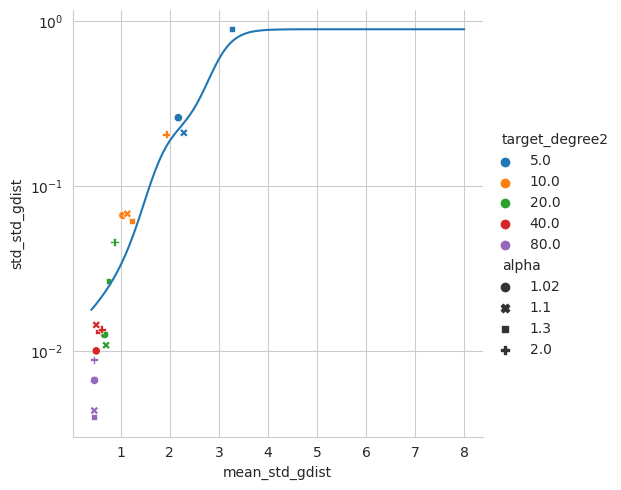

In [66]:
import seaborn as sns


g = sns.relplot(data=df, x='mean_std_gdist', y='std_std_gdist', hue='target_degree2', style='alpha')# , hue_order=_genders, aspect=1.61)

# g = sns.relplot(...)
# g.set(xscale="log")
g.set(yscale="log")

means = np.linspace(0.5, 6, 10)
ys = np.exp(means * 0.85)/100
def get_std_std_gdist(std_gdist):
    return np.exp(std_gdist * 0.85) / 100

def gaussian_kernel(x, x_i, bandwidth):
    return np.exp(-0.5 * ((x - x_i) / bandwidth) ** 2) / (bandwidth * np.sqrt(2 * np.pi))

def kernel_regression(X, y, x, bandwidth):
    weights = gaussian_kernel(x, X, bandwidth)
    return np.dot(weights, y) / np.sum(weights)

x_plot = np.linspace(0.4, 8, num=100)
y_plot = [kernel_regression(df.mean_std_gdist, df.std_std_gdist, x, 0.5) for x in x_plot]
plt.plot(x_plot, y_plot)


# plt.plot(means, ys)

In [25]:
get_std_std_gdist(3.0) / 3.0

0.0426903459422101

In [21]:
gtemp2, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, desiredAvgDegree=target_avg_degree, weights=None)

In [33]:
gtemp2, edges, weights, pts, c, id2gnk = generation.cgirg_gen(n, d, tau, alpha, const=0.000000001, weights=None)

In [34]:
nk.overview(gtemp2)

Network Properties:
nodes, edges			1000, 25157
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.050364
clustering coefficient		0.633974
min/max/avg degree		8, 853, 50.314000
degree assortativity		-0.243087
number of connected components	1
size of largest component	1000 (100.00 %)
